## Pipeline for Data preprocessing and modelling

In [1]:
import pandas as pd
import numpy as np
import os
import gc

import pickle
import matplotlib.pyplot as plt
%matplotlib inline

_FOLDER = "data/"
_FOLDER_2 = "results/"

In [2]:
# all functions are stored in all_functions.py

from all_functions import DataPreprocessing, TrainTestSplit, r2_score_fitting, mae_score_reconstruct
from training_testing import TrainTest_KR_Alg1, TrainTest_SVR_Alg1, ShowErrors, CompareTrainingScenarios, CompareTrainingScenariosModels

In [3]:
with open(_FOLDER_2+"X_features_cancer_cell_lines.txt", 'r') as f:
    X_cancer_cell_lines = [line.rstrip('\n') for line in f]
# *****************************************

with open(_FOLDER_2+"X_PubChem_properties.txt", 'r') as f:
    X_PubChem_properties = [line.rstrip('\n') for line in f]
# *****************************************

with open(_FOLDER_2+"X_features_Targets.txt", 'r') as f:
    X_targets = [line.rstrip('\n') for line in f]
# *****************************************

with open(_FOLDER_2+"X_features_Target_Pathway.txt", 'r') as f:
    X_target_pathway = [line.rstrip('\n') for line in f]
# *****************************************

X_columns = ["MAX_CONC"] + X_PubChem_properties +  X_targets + X_target_pathway + X_cancer_cell_lines

## ML training

## Best parameters Algoritm_1 (drug-by-drug)

In [4]:
models_dict = {}
models_dict["Poly_KR"]={}
models_dict["Poly_KR"]["hyperparameters"] = pd.read_csv(_FOLDER_2+"hyperparameters_coef1_alg1.csv").set_index("DRUG_ID")
models_dict["Poly_KR"]["kernel"]= "polynomial"
models_dict["Poly_KR"]['model_type']= "KR_alg1"

models_dict["RBF_SVR"]={}
models_dict["RBF_SVR"]["hyperparameters"] = pd.read_csv(_FOLDER_2+"hyperparameters_coef2_alg1.csv").set_index("DRUG_ID")
models_dict["RBF_SVR"]["kernel"]= "rbf"
models_dict["RBF_SVR"]['model_type']= "SVR_alg1"

models_dict["Linear_SVR"]={}
models_dict["Linear_SVR"]["hyperparameters"] = pd.read_csv(_FOLDER_2+"hyperparameters_coef3_alg1.csv").set_index("DRUG_ID")
models_dict["Linear_SVR"]["kernel"]= "linear"
models_dict["Linear_SVR"]['model_type']= "SVR_alg1"

models_dict["Poly_KR"]={}
models_dict["Poly_KR"]["hyperparameters"] = pd.read_csv(_FOLDER_2+"hyperparameters_coef4_alg1.csv").set_index("DRUG_ID")
models_dict["Poly_KR"]["kernel"]= "rbf"
models_dict["Poly_KR"]['model_type']= "KR_alg1"

100%|██████████| 2776/2776 [00:09<00:00, 290.93it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.569 +/- 0.86
MRE: 51.2 +/- 44.5

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:09<00:00, 305.31it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.569 +/- 0.86
MRE: 51.2 +/- 44.5

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 363.42it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.134 +/- 0.081
MRE: 28.4 +/- 13.6

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 380.51it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.532 +/- 0.837
MRE: 50.5 +/- 50.2

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 385.62it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.532 +/- 0.837
MRE: 50.5 +/- 50.2

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 334.95it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.157 +/- 0.088
MRE: 31.0 +/- 13.6

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 354.19it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.462 +/- 0.84
MRE: 25.2 +/- 8.9

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:09<00:00, 297.69it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.462 +/- 0.84
MRE: 25.2 +/- 8.9

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:11<00:00, 247.85it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.081 +/- 0.019
MRE: 20.3 +/- 4.3

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:10<00:00, 257.14it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.443 +/- 0.8
MRE: 23.9 +/- 9.4

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 407.45it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.443 +/- 0.8
MRE: 23.9 +/- 9.4

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 411.83it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.095 +/- 0.02
MRE: 22.0 +/- 4.7

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 404.54it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 1.231 +/- 1.601
MRE: 256.3 +/- 373.0

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 339.60it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 1.231 +/- 1.601
MRE: 256.3 +/- 373.0

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 325.93it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.092 +/- 0.02
MRE: 24.5 +/- 7.9

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 329.83it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 1.234 +/- 1.684
MRE: 273.7 +/- 398.4

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 374.25it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 1.234 +/- 1.684
MRE: 273.7 +/- 398.4

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 324.90it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.101 +/- 0.019
MRE: 25.0 +/- 6.9

(691, 1370) (177, 1370)

 sigmoid_4_param


,mae_coef_1,mre_coef_1,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.569 +/- 0.86,51.2 +/- 44.5,"781 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.462 +/- 0.84,25.2 +/- 8.9,"781 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",1.231 +/- 1.601,256.3 +/- 373.0,"781 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.569 +/- 0.86,51.2 +/- 44.5,"781 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.462 +/- 0.84,25.2 +/- 8.9,"781 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",1.231 +/- 1.601,256.3 +/- 373.0,"781 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.134 +/- 0.081,28.4 +/- 13.6,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.081 +/- 0.019,20.3 +/- 4.3,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.092 +/- 0.02,24.5 +/- 7.9,"723 , 185"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.532 +/- 0.837,50.5 +/- 50.2,"703 , 180"


100%|██████████| 2776/2776 [00:07<00:00, 348.05it/s]


logistic4 Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.3 +/- 0.28
MRE: 30.9 +/- 29.1

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:10<00:00, 274.09it/s]


logistic4 Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.3 +/- 0.28
MRE: 30.9 +/- 29.1

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:12<00:00, 220.59it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.234 +/- 0.196
MRE: 24.1 +/- 20.1

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 319.27it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.241 +/- 0.196
MRE: 24.8 +/- 20.2

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 404.89it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.241 +/- 0.196
MRE: 24.8 +/- 20.2

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 397.54it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.241 +/- 0.196
MRE: 24.8 +/- 20.2

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 399.01it/s]


logistic4 Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.016 +/- 0.003
MRE: 1.6 +/- 0.3

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 355.94it/s]


logistic4 Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.016 +/- 0.003
MRE: 1.6 +/- 0.3

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 370.82it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.017 +/- 0.004
MRE: 1.7 +/- 0.4

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 382.66it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.014 +/- 0.003
MRE: 1.5 +/- 0.3

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 396.53it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.014 +/- 0.003
MRE: 1.5 +/- 0.3

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 398.21it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.014 +/- 0.002
MRE: 1.5 +/- 0.3

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 396.95it/s]


logistic4 Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 0.022 +/- 0.01
MRE: 2.2 +/- 1.0

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 339.39it/s]


logistic4 Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 0.022 +/- 0.01
MRE: 2.2 +/- 1.0

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 381.57it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.023 +/- 0.007
MRE: 2.3 +/- 0.8

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 310.02it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 0.019 +/- 0.006
MRE: 1.9 +/- 0.6

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 366.02it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 0.019 +/- 0.006
MRE: 1.9 +/- 0.6

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 327.83it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.018 +/- 0.006
MRE: 1.9 +/- 0.6

(704, 1370) (180, 1370)

 logistic4


,mae_coef_1,mre_coef_1,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.3 +/- 0.28,30.9 +/- 29.1,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.016 +/- 0.003,1.6 +/- 0.3,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.022 +/- 0.01,2.2 +/- 1.0,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.3 +/- 0.28,30.9 +/- 29.1,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.016 +/- 0.003,1.6 +/- 0.3,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.022 +/- 0.01,2.2 +/- 1.0,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.234 +/- 0.196,24.1 +/- 20.1,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.017 +/- 0.004,1.7 +/- 0.4,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.023 +/- 0.007,2.3 +/- 0.8,"736 , 189"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.241 +/- 0.196,24.8 +/- 20.2,"705 , 180"


100%|██████████| 2776/2776 [00:07<00:00, 353.19it/s]


logLogistR Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.132 +/- 0.055
MRE: -37.5 +/- 23.6

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 341.41it/s]


logLogistR Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.132 +/- 0.055
MRE: -37.5 +/- 23.6

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 353.81it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.124 +/- 0.046
MRE: -31.6 +/- 12.9

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 352.55it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.122 +/- 0.03
MRE: -32.7 +/- 10.8

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 333.54it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.122 +/- 0.03
MRE: -32.7 +/- 10.8

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:08<00:00, 292.42it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.12 +/- 0.029
MRE: -33.6 +/- 10.4

(704, 1369) (180, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 348.94it/s]


logLogistR Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.086 +/- 0.018
MRE: -26.1 +/- 8.1

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 363.14it/s]


logLogistR Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.086 +/- 0.018
MRE: -26.1 +/- 8.1

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 344.98it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.089 +/- 0.026
MRE: -25.9 +/- 8.6

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:08<00:00, 294.84it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.089 +/- 0.026
MRE: -28.6 +/- 11.6

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 353.20it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.089 +/- 0.026
MRE: -28.6 +/- 11.6

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 343.55it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.091 +/- 0.027
MRE: -30.8 +/- 12.1

(704, 1369) (180, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 332.22it/s]


logLogistR Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 0.097 +/- 0.027
MRE: -33.0 +/- 16.2

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 359.84it/s]


logLogistR Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 0.097 +/- 0.027
MRE: -33.0 +/- 16.2

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 339.45it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.092 +/- 0.025
MRE: -28.9 +/- 10.6

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:08<00:00, 311.44it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 0.092 +/- 0.025
MRE: -33.2 +/- 16.3

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 362.34it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 0.092 +/- 0.025
MRE: -33.2 +/- 16.3

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:08<00:00, 311.81it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.096 +/- 0.03
MRE: -36.0 +/- 16.7

(704, 1369) (180, 1369)

 logLogistR


,mae_coef_1,mre_coef_1,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.132 +/- 0.055,-37.5 +/- 23.6,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.086 +/- 0.018,-26.1 +/- 8.1,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.097 +/- 0.027,-33.0 +/- 16.2,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.132 +/- 0.055,-37.5 +/- 23.6,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.086 +/- 0.018,-26.1 +/- 8.1,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.097 +/- 0.027,-33.0 +/- 16.2,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.124 +/- 0.046,-31.6 +/- 12.9,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.089 +/- 0.026,-25.9 +/- 8.6,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.092 +/- 0.025,-28.9 +/- 10.6,"736 , 188"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.122 +/- 0.03,-32.7 +/- 10.8,"705 , 180"


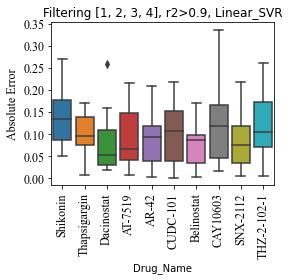

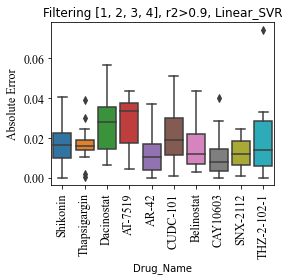

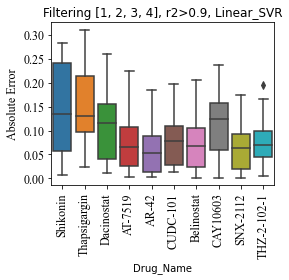

In [5]:
fitting_functions = ["sigmoid_4_param", "logistic4", "logLogistR"]
filtering_scenarios = [[1,2,3],[1,2,3,4]]
r2_restrictions = [None, 0, 0.9]

coef=1
results_1 = CompareTrainingScenariosModels(coef, models_dict, X_columns, _FOLDER, _FOLDER_2, 
                                           fitting_functions, filtering_scenarios, r2_restrictions,
                                           print_progress_info = False)

100%|██████████| 2776/2776 [00:07<00:00, 394.46it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.781 +/- 0.947
MRE: 36.1 +/- 28.7

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 373.47it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.781 +/- 0.947
MRE: 36.1 +/- 28.7

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 325.84it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.287 +/- 0.187
MRE: 25.9 +/- 18.0

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 411.26it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.696 +/- 0.819
MRE: 31.7 +/- 22.5

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 407.25it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.696 +/- 0.819
MRE: 31.7 +/- 22.5

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 407.59it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.295 +/- 0.191
MRE: 26.7 +/- 18.6

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 407.53it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.47 +/- 0.946
MRE: 8.7 +/- 20.6

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 404.23it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.47 +/- 0.946
MRE: 8.7 +/- 20.6

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 404.21it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.097 +/- 0.045
MRE: 8.4 +/- 3.3

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 409.90it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.438 +/- 0.774
MRE: 3.6 +/- 11.8

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 409.94it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.438 +/- 0.774
MRE: 3.6 +/- 11.8

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 409.15it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.097 +/- 0.048
MRE: 8.3 +/- 3.6

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 403.94it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 1.261 +/- 1.716
MRE: 97.6 +/- 134.3

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 410.33it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 1.261 +/- 1.716
MRE: 97.6 +/- 134.3

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 398.16it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.139 +/- 0.058
MRE: 13.0 +/- 5.7

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 357.93it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 1.283 +/- 1.747
MRE: 99.4 +/- 152.1

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 410.75it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 1.283 +/- 1.747
MRE: 99.4 +/- 152.1

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 415.89it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.128 +/- 0.065
MRE: 11.6 +/- 5.8

(691, 1370) (177, 1370)

 sigmoid_4_param


,mae_coef_2,mre_coef_2,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.781 +/- 0.947,36.1 +/- 28.7,"781 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.47 +/- 0.946,8.7 +/- 20.6,"781 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",1.261 +/- 1.716,97.6 +/- 134.3,"781 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.781 +/- 0.947,36.1 +/- 28.7,"781 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.47 +/- 0.946,8.7 +/- 20.6,"781 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",1.261 +/- 1.716,97.6 +/- 134.3,"781 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.287 +/- 0.187,25.9 +/- 18.0,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.097 +/- 0.045,8.4 +/- 3.3,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.139 +/- 0.058,13.0 +/- 5.7,"723 , 185"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.696 +/- 0.819,31.7 +/- 22.5,"703 , 180"


100%|██████████| 2776/2776 [00:07<00:00, 394.65it/s]


logistic4 Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 6.99 +/- 4.835
MRE: 64.2 +/- 24.2

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 403.47it/s]


logistic4 Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 6.99 +/- 4.835
MRE: 64.2 +/- 24.2

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 401.33it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 5.499 +/- 3.664
MRE: 59.4 +/- 20.3

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 405.18it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 5.52 +/- 2.527
MRE: 50.9 +/- 17.5

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 402.82it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 5.52 +/- 2.527
MRE: 50.9 +/- 17.5

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 399.37it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 5.52 +/- 2.561
MRE: 50.7 +/- 17.6

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 402.82it/s]


logistic4 Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 5.978 +/- 3.864
MRE: 52.9 +/- 17.2

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 398.34it/s]


logistic4 Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 5.978 +/- 3.864
MRE: 52.9 +/- 17.2

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 401.14it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 4.943 +/- 3.428
MRE: 49.4 +/- 12.3

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 405.63it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 4.767 +/- 2.402
MRE: 41.7 +/- 7.5

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 405.74it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 4.767 +/- 2.402
MRE: 41.7 +/- 7.5

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 404.17it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 4.728 +/- 2.385
MRE: 41.1 +/- 6.9

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 400.28it/s]


logistic4 Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 5.889 +/- 3.83
MRE: 57.0 +/- 21.0

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 397.83it/s]


logistic4 Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 5.889 +/- 3.83
MRE: 57.0 +/- 21.0

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 397.76it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 4.891 +/- 3.344
MRE: 54.7 +/- 20.7

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 408.36it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 4.925 +/- 2.212
MRE: 47.8 +/- 14.7

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 299.35it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 4.925 +/- 2.212
MRE: 47.8 +/- 14.7

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:09<00:00, 267.85it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 4.877 +/- 2.184
MRE: 47.2 +/- 14.4

(704, 1370) (180, 1370)

 logistic4


,mae_coef_2,mre_coef_2,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",6.99 +/- 4.835,64.2 +/- 24.2,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",5.978 +/- 3.864,52.9 +/- 17.2,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",5.889 +/- 3.83,57.0 +/- 21.0,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",6.99 +/- 4.835,64.2 +/- 24.2,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",5.978 +/- 3.864,52.9 +/- 17.2,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",5.889 +/- 3.83,57.0 +/- 21.0,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",5.499 +/- 3.664,59.4 +/- 20.3,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",4.943 +/- 3.428,49.4 +/- 12.3,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",4.891 +/- 3.344,54.7 +/- 20.7,"736 , 189"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",5.52 +/- 2.527,50.9 +/- 17.5,"705 , 180"


100%|██████████| 2776/2776 [00:14<00:00, 198.27it/s]


logLogistR Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 2.982 +/- 1.513
MRE: -48.8 +/- 19.9

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:11<00:00, 243.23it/s]


logLogistR Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 2.982 +/- 1.513
MRE: -48.8 +/- 19.9

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 361.25it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 2.715 +/- 1.184
MRE: -41.8 +/- 11.0

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 369.50it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 2.456 +/- 0.779
MRE: -38.4 +/- 9.1

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 363.78it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 2.456 +/- 0.779
MRE: -38.4 +/- 9.1

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 362.72it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 2.497 +/- 0.839
MRE: -41.0 +/- 11.6

(704, 1369) (180, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 363.22it/s]


logLogistR Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 2.44 +/- 1.26
MRE: -40.6 +/- 18.4

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 348.88it/s]


logLogistR Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 2.44 +/- 1.26
MRE: -40.6 +/- 18.4

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 364.02it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 2.367 +/- 1.228
MRE: -36.7 +/- 12.9

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 368.74it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 1.968 +/- 0.906
MRE: -30.0 +/- 7.8

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 352.90it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 1.968 +/- 0.906
MRE: -30.0 +/- 7.8

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 365.46it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 2.014 +/- 0.989
MRE: -32.0 +/- 10.6

(704, 1369) (180, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 367.72it/s]


logLogistR Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 2.376 +/- 1.227
MRE: -44.2 +/- 20.8

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 362.93it/s]


logLogistR Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 2.376 +/- 1.227
MRE: -44.2 +/- 20.8

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 363.96it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 2.447 +/- 1.336
MRE: -43.4 +/- 17.7

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 368.03it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 2.147 +/- 1.018
MRE: -37.8 +/- 15.7

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 352.07it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 2.147 +/- 1.018
MRE: -37.8 +/- 15.7

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:08<00:00, 323.20it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 2.108 +/- 1.009
MRE: -39.8 +/- 19.7

(704, 1369) (180, 1369)

 logLogistR


,mae_coef_2,mre_coef_2,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",2.982 +/- 1.513,-48.8 +/- 19.9,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",2.44 +/- 1.26,-40.6 +/- 18.4,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",2.376 +/- 1.227,-44.2 +/- 20.8,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",2.982 +/- 1.513,-48.8 +/- 19.9,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",2.44 +/- 1.26,-40.6 +/- 18.4,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",2.376 +/- 1.227,-44.2 +/- 20.8,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",2.715 +/- 1.184,-41.8 +/- 11.0,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",2.367 +/- 1.228,-36.7 +/- 12.9,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",2.447 +/- 1.336,-43.4 +/- 17.7,"736 , 188"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",2.456 +/- 0.779,-38.4 +/- 9.1,"705 , 180"


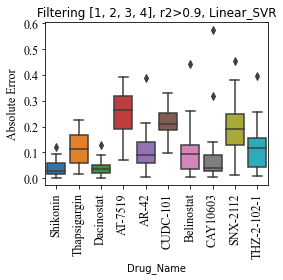

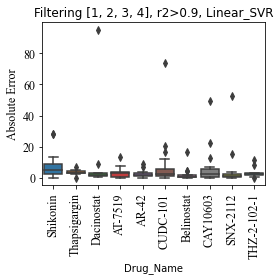

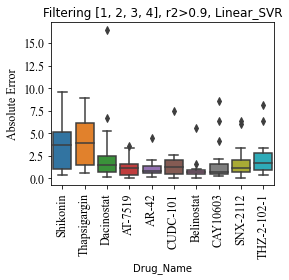

In [6]:
coef=2
results_2 = CompareTrainingScenariosModels(coef, models_dict, X_columns, _FOLDER, _FOLDER_2, 
                                           fitting_functions, filtering_scenarios, r2_restrictions,
                                           print_progress_info = False)

100%|██████████| 2776/2776 [00:06<00:00, 400.60it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 10.946 +/- 7.807
MRE: -52.0 +/- 21.0

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 402.37it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 10.946 +/- 7.807
MRE: -52.0 +/- 21.0

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 406.55it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 10.263 +/- 5.784
MRE: -47.1 +/- 8.3

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 412.93it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 7.336 +/- 3.599
MRE: -43.1 +/- 11.6

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 413.23it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 7.336 +/- 3.599
MRE: -43.1 +/- 11.6

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 409.68it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 7.669 +/- 3.795
MRE: -45.8 +/- 14.3

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 395.54it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 8.883 +/- 5.821
MRE: -42.3 +/- 12.4

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:06<00:00, 403.22it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 8.883 +/- 5.821
MRE: -42.3 +/- 12.4

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 319.80it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 9.118 +/- 5.363
MRE: -41.4 +/- 8.3

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 374.04it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 5.697 +/- 2.765
MRE: -34.8 +/- 8.6

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 328.10it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 5.697 +/- 2.765
MRE: -34.8 +/- 8.6

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 322.26it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 5.989 +/- 2.816
MRE: -37.1 +/- 11.5

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 330.67it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 8.698 +/- 5.683
MRE: -42.3 +/- 13.0

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:09<00:00, 294.51it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 8.698 +/- 5.683
MRE: -42.3 +/- 13.0

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 332.24it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 8.824 +/- 5.191
MRE: -41.2 +/- 8.7

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 383.65it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 5.68 +/- 2.56
MRE: -36.1 +/- 9.9

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 309.70it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 5.68 +/- 2.56
MRE: -36.1 +/- 9.9

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 310.49it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 5.837 +/- 2.584
MRE: -37.5 +/- 13.5

(691, 1370) (177, 1370)

 sigmoid_4_param


,mae_coef_3,mre_coef_3,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",10.946 +/- 7.807,-52.0 +/- 21.0,"781 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",8.883 +/- 5.821,-42.3 +/- 12.4,"781 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",8.698 +/- 5.683,-42.3 +/- 13.0,"781 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",10.946 +/- 7.807,-52.0 +/- 21.0,"781 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",8.883 +/- 5.821,-42.3 +/- 12.4,"781 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",8.698 +/- 5.683,-42.3 +/- 13.0,"781 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",10.263 +/- 5.784,-47.1 +/- 8.3,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",9.118 +/- 5.363,-41.4 +/- 8.3,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",8.824 +/- 5.191,-41.2 +/- 8.7,"723 , 185"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",7.336 +/- 3.599,-43.1 +/- 11.6,"703 , 180"


100%|██████████| 2776/2776 [00:07<00:00, 350.49it/s]


logistic4 Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.223 +/- 0.212
MRE: 37.8 +/- 23.1

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 341.06it/s]


logistic4 Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.223 +/- 0.212
MRE: 37.8 +/- 23.1

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 321.34it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.148 +/- 0.086
MRE: 31.8 +/- 14.1

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 334.81it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.157 +/- 0.103
MRE: 31.8 +/- 15.2

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 292.53it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.157 +/- 0.103
MRE: 31.8 +/- 15.2

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 346.88it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.162 +/- 0.105
MRE: 32.7 +/- 15.4

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 369.32it/s]


logistic4 Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.128 +/- 0.081
MRE: 24.1 +/- 5.7

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 324.05it/s]


logistic4 Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.128 +/- 0.081
MRE: 24.1 +/- 5.7

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 355.97it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.093 +/- 0.025
MRE: 24.3 +/- 9.8

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 342.79it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.099 +/- 0.038
MRE: 23.7 +/- 8.2

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:08<00:00, 321.55it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.099 +/- 0.038
MRE: 23.7 +/- 8.2

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 366.91it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.1 +/- 0.038
MRE: 23.6 +/- 8.1

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 341.55it/s]


logistic4 Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 0.328 +/- 0.423
MRE: 67.6 +/- 87.8

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 321.54it/s]


logistic4 Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 0.328 +/- 0.423
MRE: 67.6 +/- 87.8

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:08<00:00, 319.81it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.173 +/- 0.227
MRE: 44.2 +/- 51.2

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 335.40it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 0.367 +/- 0.582
MRE: 88.1 +/- 136.0

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 360.41it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 0.367 +/- 0.582
MRE: 88.1 +/- 136.0

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 339.12it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.179 +/- 0.201
MRE: 43.3 +/- 42.0

(704, 1370) (180, 1370)

 logistic4


,mae_coef_3,mre_coef_3,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.223 +/- 0.212,37.8 +/- 23.1,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.128 +/- 0.081,24.1 +/- 5.7,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.328 +/- 0.423,67.6 +/- 87.8,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.223 +/- 0.212,37.8 +/- 23.1,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.128 +/- 0.081,24.1 +/- 5.7,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.328 +/- 0.423,67.6 +/- 87.8,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.148 +/- 0.086,31.8 +/- 14.1,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.093 +/- 0.025,24.3 +/- 9.8,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.173 +/- 0.227,44.2 +/- 51.2,"736 , 189"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.157 +/- 0.103,31.8 +/- 15.2,"705 , 180"


100%|██████████| 2776/2776 [00:09<00:00, 296.40it/s]


logLogistR Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.066 +/- 0.027
MRE: 87.0 +/- 556.6

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 321.92it/s]


logLogistR Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.066 +/- 0.027
MRE: 87.0 +/- 556.6

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 323.45it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.06 +/- 0.027
MRE: -16.5 +/- 695.1

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:08<00:00, 298.47it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.066 +/- 0.032
MRE: -283.9 +/- 971.5

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 328.90it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.066 +/- 0.032
MRE: -283.9 +/- 971.5

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:10<00:00, 249.87it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.068 +/- 0.033
MRE: -304.6 +/- 987.9

(704, 1369) (180, 1369)


100%|██████████| 2776/2776 [00:10<00:00, 256.78it/s]


logLogistR Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.067 +/- 0.026
MRE: 176.5 +/- 630.3

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:09<00:00, 294.70it/s]


logLogistR Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.067 +/- 0.026
MRE: 176.5 +/- 630.3

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 319.31it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.06 +/- 0.028
MRE: -21.7 +/- 615.7

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 355.75it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.065 +/- 0.033
MRE: -256.8 +/- 933.2

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 355.23it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.065 +/- 0.033
MRE: -256.8 +/- 933.2

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 358.55it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.068 +/- 0.033
MRE: -275.5 +/- 944.6

(704, 1369) (180, 1369)


100%|██████████| 2776/2776 [00:07<00:00, 357.12it/s]


logLogistR Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 0.092 +/- 0.026
MRE: 62.6 +/- 1557.1

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:08<00:00, 339.67it/s]


logLogistR Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 0.092 +/- 0.026
MRE: 62.6 +/- 1557.1

(783, 1369) (202, 1369)


100%|██████████| 2776/2776 [00:10<00:00, 275.99it/s]


logLogistR Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.091 +/- 0.024
MRE: -405.3 +/- 1476.1

(736, 1369) (188, 1369)


100%|██████████| 2600/2600 [00:09<00:00, 279.31it/s]


logLogistR Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 0.11 +/- 0.026
MRE: -233.8 +/- 1216.6

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 356.80it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 0.11 +/- 0.026
MRE: -233.8 +/- 1216.6

(705, 1369) (180, 1369)


100%|██████████| 2600/2600 [00:07<00:00, 357.60it/s]


logLogistR Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.109 +/- 0.031
MRE: -311.3 +/- 1296.6

(704, 1369) (180, 1369)

 logLogistR


,mae_coef_3,mre_coef_3,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.066 +/- 0.027,87.0 +/- 556.6,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.067 +/- 0.026,176.5 +/- 630.3,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.092 +/- 0.026,62.6 +/- 1557.1,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.066 +/- 0.027,87.0 +/- 556.6,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.067 +/- 0.026,176.5 +/- 630.3,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.092 +/- 0.026,62.6 +/- 1557.1,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.06 +/- 0.027,-16.5 +/- 695.1,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.06 +/- 0.028,-21.7 +/- 615.7,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.091 +/- 0.024,-405.3 +/- 1476.1,"736 , 188"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.066 +/- 0.032,-283.9 +/- 971.5,"705 , 180"


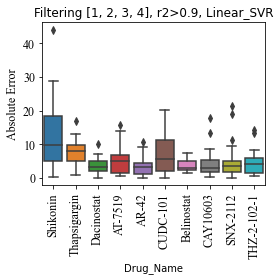

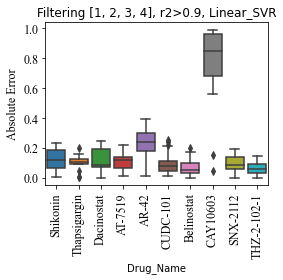

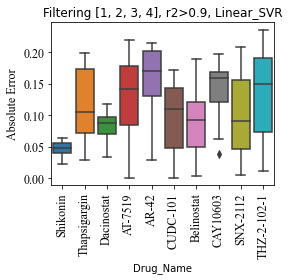

In [7]:
coef=3
results_3 = CompareTrainingScenariosModels(coef, models_dict, X_columns, _FOLDER, _FOLDER_2, 
                                           fitting_functions, filtering_scenarios, r2_restrictions,
                                           print_progress_info = False)

100%|██████████| 2776/2776 [00:07<00:00, 382.42it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.12 +/- 0.136
MRE: 112.3 +/- 156.2

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 392.95it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.12 +/- 0.136
MRE: 112.3 +/- 156.2

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 395.17it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.064 +/- 0.028
MRE: 2.5 +/- 156.9

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 395.43it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.076 +/- 0.041
MRE: -27.4 +/- 910.0

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 388.54it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.076 +/- 0.041
MRE: -27.4 +/- 910.0

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 397.73it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.069 +/- 0.035
MRE: -75.0 +/- 907.6

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 376.14it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.121 +/- 0.139
MRE: 129.0 +/- 160.8

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 391.53it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.121 +/- 0.139
MRE: 129.0 +/- 160.8

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 394.55it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.064 +/- 0.03
MRE: 29.9 +/- 151.6

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:07<00:00, 341.62it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.076 +/- 0.041
MRE: 54.1 +/- 736.2

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 398.30it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.076 +/- 0.041
MRE: 54.1 +/- 736.2

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 399.64it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.069 +/- 0.036
MRE: -40.1 +/- 838.8

(691, 1370) (177, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 385.71it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 0.233 +/- 0.307
MRE: 390.8 +/- 396.2

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 394.14it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 0.233 +/- 0.307
MRE: 390.8 +/- 396.2

(781, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 366.19it/s]


sigmoid_4_param Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.081 +/- 0.028
MRE: 95.4 +/- 308.4

(723, 1370) (185, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 393.87it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 0.1 +/- 0.03
MRE: 569.6 +/- 1878.1

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 378.79it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 0.1 +/- 0.03
MRE: 569.6 +/- 1878.1

(703, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 399.40it/s]


sigmoid_4_param Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.085 +/- 0.032
MRE: 476.2 +/- 1852.0

(691, 1370) (177, 1370)

 sigmoid_4_param


,mae_coef_4,mre_coef_4,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.12 +/- 0.136,112.3 +/- 156.2,"781 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.121 +/- 0.139,129.0 +/- 160.8,"781 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.233 +/- 0.307,390.8 +/- 396.2,"781 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.12 +/- 0.136,112.3 +/- 156.2,"781 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.121 +/- 0.139,129.0 +/- 160.8,"781 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.233 +/- 0.307,390.8 +/- 396.2,"781 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.064 +/- 0.028,2.5 +/- 156.9,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.064 +/- 0.03,29.9 +/- 151.6,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.081 +/- 0.028,95.4 +/- 308.4,"723 , 185"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.076 +/- 0.041,-27.4 +/- 910.0,"703 , 180"


100%|██████████| 2776/2776 [00:07<00:00, 389.65it/s]


logistic4 Filtering [1, 2, 3], r2>None, Poly_KR

MAE: 0.232 +/- 0.301
MRE: 54.9 +/- 338.2

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 392.25it/s]


logistic4 Filtering [1, 2, 3], r2>0, Poly_KR

MAE: 0.232 +/- 0.301
MRE: 54.9 +/- 338.2

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 373.13it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Poly_KR

MAE: 0.088 +/- 0.031
MRE: 59.4 +/- 270.1

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:09<00:00, 262.80it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Poly_KR

MAE: 0.096 +/- 0.047
MRE: 7807.7 +/- 23517.3

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 393.67it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Poly_KR

MAE: 0.096 +/- 0.047
MRE: 7807.7 +/- 23517.3

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 385.37it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Poly_KR

MAE: 0.092 +/- 0.052
MRE: 7760.6 +/- 23532.4

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 390.72it/s]


logistic4 Filtering [1, 2, 3], r2>None, RBF_SVR

MAE: 0.218 +/- 0.31
MRE: 129.9 +/- 239.7

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 390.48it/s]


logistic4 Filtering [1, 2, 3], r2>0, RBF_SVR

MAE: 0.218 +/- 0.31
MRE: 129.9 +/- 239.7

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 389.12it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, RBF_SVR

MAE: 0.077 +/- 0.029
MRE: 105.2 +/- 240.4

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 375.05it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, RBF_SVR

MAE: 0.086 +/- 0.049
MRE: 9154.4 +/- 27483.3

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 399.10it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, RBF_SVR

MAE: 0.086 +/- 0.049
MRE: 9154.4 +/- 27483.3

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 395.92it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, RBF_SVR

MAE: 0.087 +/- 0.049
MRE: 9156.0 +/- 27482.8

(704, 1370) (180, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 376.32it/s]


logistic4 Filtering [1, 2, 3], r2>None, Linear_SVR

MAE: 0.458 +/- 0.555
MRE: -1219.5 +/- 4891.3

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 382.53it/s]


logistic4 Filtering [1, 2, 3], r2>0, Linear_SVR

MAE: 0.458 +/- 0.555
MRE: -1219.5 +/- 4891.3

(783, 1370) (202, 1370)


100%|██████████| 2776/2776 [00:07<00:00, 388.66it/s]


logistic4 Filtering [1, 2, 3], r2>0.9, Linear_SVR

MAE: 0.159 +/- 0.193
MRE: 41.9 +/- 888.7

(736, 1370) (189, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 394.85it/s]


logistic4 Filtering [1, 2, 3, 4], r2>None, Linear_SVR

MAE: 0.604 +/- 1.167
MRE: 12827.2 +/- 38588.7

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 394.39it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0, Linear_SVR

MAE: 0.604 +/- 1.167
MRE: 12827.2 +/- 38588.7

(705, 1370) (180, 1370)


100%|██████████| 2600/2600 [00:06<00:00, 379.32it/s]


logistic4 Filtering [1, 2, 3, 4], r2>0.9, Linear_SVR

MAE: 0.202 +/- 0.231
MRE: 10243.0 +/- 38474.3

(704, 1370) (180, 1370)

 logistic4


,mae_coef_4,mre_coef_4,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.232 +/- 0.301,54.9 +/- 338.2,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.218 +/- 0.31,129.9 +/- 239.7,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.458 +/- 0.555,-1219.5 +/- 4891.3,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.232 +/- 0.301,54.9 +/- 338.2,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.218 +/- 0.31,129.9 +/- 239.7,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.458 +/- 0.555,-1219.5 +/- 4891.3,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.088 +/- 0.031,59.4 +/- 270.1,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.077 +/- 0.029,105.2 +/- 240.4,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.159 +/- 0.193,41.9 +/- 888.7,"736 , 189"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.096 +/- 0.047,7807.7 +/- 23517.3,"705 , 180"


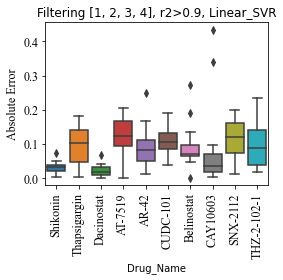

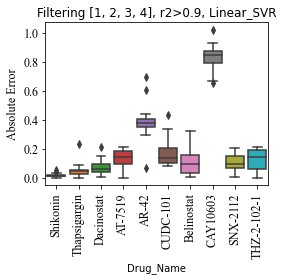

In [8]:
coef=4
fitting_functions = ["sigmoid_4_param", "logistic4"]
results_4 = CompareTrainingScenariosModels(coef, models_dict, X_columns, _FOLDER, _FOLDER_2, 
                                           fitting_functions, filtering_scenarios, r2_restrictions,
                                           print_progress_info = False)

In [9]:
fitting_function = "sigmoid_4_param"
df1_results = results_1[fitting_function]
df1_results = pd.concat([results_1[fitting_function],results_2[fitting_function],
                        results_3[fitting_function], results_4[fitting_function]],axis=1)
df1_results

,mae_coef_1,mre_coef_1,train_test_shape,mae_coef_2,mre_coef_2,train_test_shape,mae_coef_3,mre_coef_3,train_test_shape,mae_coef_4,mre_coef_4,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.569 +/- 0.86,51.2 +/- 44.5,"781 , 202",0.781 +/- 0.947,36.1 +/- 28.7,"781 , 202",10.946 +/- 7.807,-52.0 +/- 21.0,"781 , 202",0.12 +/- 0.136,112.3 +/- 156.2,"781 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.462 +/- 0.84,25.2 +/- 8.9,"781 , 202",0.47 +/- 0.946,8.7 +/- 20.6,"781 , 202",8.883 +/- 5.821,-42.3 +/- 12.4,"781 , 202",0.121 +/- 0.139,129.0 +/- 160.8,"781 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",1.231 +/- 1.601,256.3 +/- 373.0,"781 , 202",1.261 +/- 1.716,97.6 +/- 134.3,"781 , 202",8.698 +/- 5.683,-42.3 +/- 13.0,"781 , 202",0.233 +/- 0.307,390.8 +/- 396.2,"781 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.569 +/- 0.86,51.2 +/- 44.5,"781 , 202",0.781 +/- 0.947,36.1 +/- 28.7,"781 , 202",10.946 +/- 7.807,-52.0 +/- 21.0,"781 , 202",0.12 +/- 0.136,112.3 +/- 156.2,"781 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.462 +/- 0.84,25.2 +/- 8.9,"781 , 202",0.47 +/- 0.946,8.7 +/- 20.6,"781 , 202",8.883 +/- 5.821,-42.3 +/- 12.4,"781 , 202",0.121 +/- 0.139,129.0 +/- 160.8,"781 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",1.231 +/- 1.601,256.3 +/- 373.0,"781 , 202",1.261 +/- 1.716,97.6 +/- 134.3,"781 , 202",8.698 +/- 5.683,-42.3 +/- 13.0,"781 , 202",0.233 +/- 0.307,390.8 +/- 396.2,"781 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.134 +/- 0.081,28.4 +/- 13.6,"723 , 185",0.287 +/- 0.187,25.9 +/- 18.0,"723 , 185",10.263 +/- 5.784,-47.1 +/- 8.3,"723 , 185",0.064 +/- 0.028,2.5 +/- 156.9,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.081 +/- 0.019,20.3 +/- 4.3,"723 , 185",0.097 +/- 0.045,8.4 +/- 3.3,"723 , 185",9.118 +/- 5.363,-41.4 +/- 8.3,"723 , 185",0.064 +/- 0.03,29.9 +/- 151.6,"723 , 185"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.092 +/- 0.02,24.5 +/- 7.9,"723 , 185",0.139 +/- 0.058,13.0 +/- 5.7,"723 , 185",8.824 +/- 5.191,-41.2 +/- 8.7,"723 , 185",0.081 +/- 0.028,95.4 +/- 308.4,"723 , 185"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.532 +/- 0.837,50.5 +/- 50.2,"703 , 180",0.696 +/- 0.819,31.7 +/- 22.5,"703 , 180",7.336 +/- 3.599,-43.1 +/- 11.6,"703 , 180",0.076 +/- 0.041,-27.4 +/- 910.0,"703 , 180"


In [10]:
fitting_function = "logistic4"
df2_results = results_1[fitting_function]
df2_results = pd.concat([results_1[fitting_function],results_2[fitting_function],
                        results_3[fitting_function], results_4[fitting_function]],axis=1)
df2_results

,mae_coef_1,mre_coef_1,train_test_shape,mae_coef_2,mre_coef_2,train_test_shape,mae_coef_3,mre_coef_3,train_test_shape,mae_coef_4,mre_coef_4,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.3 +/- 0.28,30.9 +/- 29.1,"783 , 202",6.99 +/- 4.835,64.2 +/- 24.2,"783 , 202",0.223 +/- 0.212,37.8 +/- 23.1,"783 , 202",0.232 +/- 0.301,54.9 +/- 338.2,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.016 +/- 0.003,1.6 +/- 0.3,"783 , 202",5.978 +/- 3.864,52.9 +/- 17.2,"783 , 202",0.128 +/- 0.081,24.1 +/- 5.7,"783 , 202",0.218 +/- 0.31,129.9 +/- 239.7,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.022 +/- 0.01,2.2 +/- 1.0,"783 , 202",5.889 +/- 3.83,57.0 +/- 21.0,"783 , 202",0.328 +/- 0.423,67.6 +/- 87.8,"783 , 202",0.458 +/- 0.555,-1219.5 +/- 4891.3,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.3 +/- 0.28,30.9 +/- 29.1,"783 , 202",6.99 +/- 4.835,64.2 +/- 24.2,"783 , 202",0.223 +/- 0.212,37.8 +/- 23.1,"783 , 202",0.232 +/- 0.301,54.9 +/- 338.2,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.016 +/- 0.003,1.6 +/- 0.3,"783 , 202",5.978 +/- 3.864,52.9 +/- 17.2,"783 , 202",0.128 +/- 0.081,24.1 +/- 5.7,"783 , 202",0.218 +/- 0.31,129.9 +/- 239.7,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.022 +/- 0.01,2.2 +/- 1.0,"783 , 202",5.889 +/- 3.83,57.0 +/- 21.0,"783 , 202",0.328 +/- 0.423,67.6 +/- 87.8,"783 , 202",0.458 +/- 0.555,-1219.5 +/- 4891.3,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.234 +/- 0.196,24.1 +/- 20.1,"736 , 189",5.499 +/- 3.664,59.4 +/- 20.3,"736 , 189",0.148 +/- 0.086,31.8 +/- 14.1,"736 , 189",0.088 +/- 0.031,59.4 +/- 270.1,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.017 +/- 0.004,1.7 +/- 0.4,"736 , 189",4.943 +/- 3.428,49.4 +/- 12.3,"736 , 189",0.093 +/- 0.025,24.3 +/- 9.8,"736 , 189",0.077 +/- 0.029,105.2 +/- 240.4,"736 , 189"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.023 +/- 0.007,2.3 +/- 0.8,"736 , 189",4.891 +/- 3.344,54.7 +/- 20.7,"736 , 189",0.173 +/- 0.227,44.2 +/- 51.2,"736 , 189",0.159 +/- 0.193,41.9 +/- 888.7,"736 , 189"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.241 +/- 0.196,24.8 +/- 20.2,"705 , 180",5.52 +/- 2.527,50.9 +/- 17.5,"705 , 180",0.157 +/- 0.103,31.8 +/- 15.2,"705 , 180",0.096 +/- 0.047,7807.7 +/- 23517.3,"705 , 180"


In [11]:
fitting_function = "logLogistR"
df3_results = results_1[fitting_function]
df3_results = pd.concat([results_1[fitting_function],results_2[fitting_function],
                        results_3[fitting_function]],axis=1)
df3_results

,mae_coef_1,mre_coef_1,train_test_shape,mae_coef_2,mre_coef_2,train_test_shape,mae_coef_3,mre_coef_3,train_test_shape
"Filtering [1, 2, 3], r2>None, Poly_KR",0.132 +/- 0.055,-37.5 +/- 23.6,"783 , 202",2.982 +/- 1.513,-48.8 +/- 19.9,"783 , 202",0.066 +/- 0.027,87.0 +/- 556.6,"783 , 202"
"Filtering [1, 2, 3], r2>None, RBF_SVR",0.086 +/- 0.018,-26.1 +/- 8.1,"783 , 202",2.44 +/- 1.26,-40.6 +/- 18.4,"783 , 202",0.067 +/- 0.026,176.5 +/- 630.3,"783 , 202"
"Filtering [1, 2, 3], r2>None, Linear_SVR",0.097 +/- 0.027,-33.0 +/- 16.2,"783 , 202",2.376 +/- 1.227,-44.2 +/- 20.8,"783 , 202",0.092 +/- 0.026,62.6 +/- 1557.1,"783 , 202"
"Filtering [1, 2, 3], r2>0, Poly_KR",0.132 +/- 0.055,-37.5 +/- 23.6,"783 , 202",2.982 +/- 1.513,-48.8 +/- 19.9,"783 , 202",0.066 +/- 0.027,87.0 +/- 556.6,"783 , 202"
"Filtering [1, 2, 3], r2>0, RBF_SVR",0.086 +/- 0.018,-26.1 +/- 8.1,"783 , 202",2.44 +/- 1.26,-40.6 +/- 18.4,"783 , 202",0.067 +/- 0.026,176.5 +/- 630.3,"783 , 202"
"Filtering [1, 2, 3], r2>0, Linear_SVR",0.097 +/- 0.027,-33.0 +/- 16.2,"783 , 202",2.376 +/- 1.227,-44.2 +/- 20.8,"783 , 202",0.092 +/- 0.026,62.6 +/- 1557.1,"783 , 202"
"Filtering [1, 2, 3], r2>0.9, Poly_KR",0.124 +/- 0.046,-31.6 +/- 12.9,"736 , 188",2.715 +/- 1.184,-41.8 +/- 11.0,"736 , 188",0.06 +/- 0.027,-16.5 +/- 695.1,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, RBF_SVR",0.089 +/- 0.026,-25.9 +/- 8.6,"736 , 188",2.367 +/- 1.228,-36.7 +/- 12.9,"736 , 188",0.06 +/- 0.028,-21.7 +/- 615.7,"736 , 188"
"Filtering [1, 2, 3], r2>0.9, Linear_SVR",0.092 +/- 0.025,-28.9 +/- 10.6,"736 , 188",2.447 +/- 1.336,-43.4 +/- 17.7,"736 , 188",0.091 +/- 0.024,-405.3 +/- 1476.1,"736 , 188"
"Filtering [1, 2, 3, 4], r2>None, Poly_KR",0.122 +/- 0.03,-32.7 +/- 10.8,"705 , 180",2.456 +/- 0.779,-38.4 +/- 9.1,"705 , 180",0.066 +/- 0.032,-283.9 +/- 971.5,"705 , 180"


## Reconstruction with Algorithm 1 

In [12]:
ml_scenario = "Filtering [1,2,3,4], no restriction r2, sigmoid_4_param / previous parameters"
print(ml_scenario)

df= DataPreprocessing(folder_with_original_data= _FOLDER, folder_with_results =_FOLDER_2, 
                      filtering_scenario = [1,2,3,4],
                      first_points_lower_limit = 0.8, last_points_upper_limit = 0.4,
                      middle_points_limit =-0.1,
                     fitting_function = "sigmoid_4_param", 
                      keep_r2_column = True,
                     print_progress_info = False)

drug_ids_limit, train_df_limit, test_df_limit = TrainTestSplit(df, min_number_drug_profiles =50, train_ratio= 0.8, 
                                                               r2_restriction = 0, print_progress_info = False)

print("Coefficient 1")
coef=1
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
kernel = "polynomial"

mae, mre, y_pred1, train_shape, test_shape = TrainTest_KR_Alg1(train_df_limit, test_df_limit, target = "param_1", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)

                      
test_df_limit["pred_param_1"] = y_pred1

print("Coefficient 2")
coef=2
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

kernel = "rbf"

mae, mre, y_pred2, train_shape, test_shape = TrainTest_SVR_Alg1(train_df_limit, test_df_limit, target = "param_2", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                   
test_df_limit["pred_param_2"] = y_pred2

print("Coefficient 3")
coef=3
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

kernel = "linear"

mae, mre, y_pred3, train_shape, test_shape = TrainTest_SVR_Alg1(train_df_limit, test_df_limit, target = "param_3", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                   
test_df_limit["pred_param_3"] = y_pred3

print("Coefficient 4")
coef=4
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
kernel = "polynomial"

mae, mre, y_pred4, train_shape, test_shape = TrainTest_KR_Alg1(train_df_limit, test_df_limit, target = "param_4", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                      
test_df_limit["pred_param_4"] = y_pred4

conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]

r2_fitting = r2_score_fitting(df=test_df_limit, x_columns= conc_columns,fitting_function = "sigmoid_4_param",
                            y_columns=response_norm, param_columns = ["pred_param_"+str(i)for i in range(1,5)])
mae_reconstruct = mae_score_reconstruct(df=test_df_limit, x_columns= conc_columns, fitting_function = "sigmoid_4_param",
                                        y_columns=response_norm, param_columns = ["pred_param_"+str(i)for i in range(1,5)])
        

Filtering [1,2,3,4], no restriction r2, sigmoid_4_param / previous parameters


100%|██████████| 2600/2600 [00:06<00:00, 414.30it/s]


Coefficient 1

MAE: 0.456 +/- 0.811
MRE: 25.0 +/- 10.1

(703, 1370) (180, 1370)
Coefficient 2

MAE: 0.438 +/- 0.774
MRE: 3.6 +/- 11.8

(703, 1370) (180, 1371)
Coefficient 3

MAE: 5.68 +/- 2.56
MRE: -36.1 +/- 9.9

(703, 1370) (180, 1372)
Coefficient 4

MAE: 0.095 +/- 0.058
MRE: 69.6 +/- 28.6

(703, 1370) (180, 1373)


In [13]:
ml_scenario2 = "Filtering [1,2,3], no restriction r2, sigmoid_4_param / previous parameters"
print(ml_scenario2)

df= DataPreprocessing(folder_with_original_data= _FOLDER, folder_with_results =_FOLDER_2, 
                      filtering_scenario = [1,2,3],
                      first_points_lower_limit = 0.8, last_points_upper_limit = 0.4,
                      middle_points_limit =-0.1,
                     fitting_function = "sigmoid_4_param", 
                      keep_r2_column = True,
                     print_progress_info = False)

drug_ids_limit, train_df_limit, test_df_limit = TrainTestSplit(df, min_number_drug_profiles =50, train_ratio= 0.8, 
                                                               r2_restriction = 0, print_progress_info = False)

print("Coefficient 1")
coef=1
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
kernel = "polynomial"

mae, mre, y_pred1, train_shape, test_shape = TrainTest_KR_Alg1(train_df_limit, test_df_limit, target = "param_1", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)

                      
test_df_limit["pred_param_1"] = y_pred1

print("Coefficient 2")
coef=2
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

kernel = "rbf"

mae, mre, y_pred2, train_shape, test_shape = TrainTest_SVR_Alg1(train_df_limit, test_df_limit, target = "param_2", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                   
test_df_limit["pred_param_2"] = y_pred2

print("Coefficient 3")
coef=3
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

kernel = "linear"

mae, mre, y_pred3, train_shape, test_shape = TrainTest_SVR_Alg1(train_df_limit, test_df_limit, target = "param_3", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                   
test_df_limit["pred_param_3"] = y_pred3

print("Coefficient 4")
coef=4
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
kernel = "polynomial"

mae, mre, y_pred4, train_shape, test_shape = TrainTest_KR_Alg1(train_df_limit, test_df_limit, target = "param_4", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                      
test_df_limit["pred_param_4"] = y_pred4

conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]

r2_fitting2 = r2_score_fitting(df=test_df_limit, x_columns= conc_columns,fitting_function = "sigmoid_4_param",
                            y_columns=response_norm, param_columns = ["pred_param_"+str(i)for i in range(1,5)])
mae_reconstruct2 = mae_score_reconstruct(df=test_df_limit, x_columns= conc_columns, fitting_function = "sigmoid_4_param",
                                        y_columns=response_norm, param_columns = ["pred_param_"+str(i)for i in range(1,5)])

Filtering [1,2,3], no restriction r2, sigmoid_4_param / previous parameters


100%|██████████| 2776/2776 [00:08<00:00, 323.00it/s]


Coefficient 1

MAE: 0.47 +/- 0.847
MRE: 25.3 +/- 8.8

(781, 1370) (202, 1370)
Coefficient 2

MAE: 0.47 +/- 0.946
MRE: 8.7 +/- 20.6

(781, 1370) (202, 1371)
Coefficient 3

MAE: 8.698 +/- 5.683
MRE: -42.3 +/- 13.0

(781, 1370) (202, 1372)
Coefficient 4

MAE: 0.148 +/- 0.138
MRE: 89.5 +/- 74.7

(781, 1370) (202, 1373)


In [14]:
print("-------------------------------------------------------------------")
print(ml_scenario)
print("-------------------------------------------------------------------")
print("R2 of fitting of reconstructed curves: %0.3f +/- %0.3f" % (r2_fitting.mean(), r2_fitting.std()))
print("MAE of reconstructed curvess: %0.3f +/- %0.3f" % (mae_reconstruct.mean(), mae_reconstruct.std()))                                                 
print("\n-------------------------------------------------------------------")
print(ml_scenario2)
print("-------------------------------------------------------------------")
print("R2 of fitting of reconstructed curves: %0.3f +/- %0.3f" % (r2_fitting2.mean(), r2_fitting2.std()))
print("MAE of reconstructed curvess: %0.3f +/- %0.3f" % (mae_reconstruct2.mean(), mae_reconstruct2.std()))                                                            

-------------------------------------------------------------------
Filtering [1,2,3,4], no restriction r2, sigmoid_4_param / previous parameters
-------------------------------------------------------------------
R2 of fitting of reconstructed curves: 0.597 +/- 0.655
MAE of reconstructed curvess: 0.142 +/- 0.092

-------------------------------------------------------------------
Filtering [1,2,3], no restriction r2, sigmoid_4_param / previous parameters
-------------------------------------------------------------------
R2 of fitting of reconstructed curves: 0.650 +/- 0.422
MAE of reconstructed curvess: 0.138 +/- 0.077


### Conclusion: 4 stage filtration is less efficient than 3 stage filtration!!!!

In [15]:
#### Draft Results

In [16]:
# Coefficient 1
coef =1 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

tested_scenarios = {}

for fitting_function in ["sigmoid_4_param", "logistic4", "logLogistR"]:
    for model in ["Poly_KR","RBF_SVR", "Linear_SVR","Poly_KR"]
        for filtering in [[1,2,3],[1,2,3,4]]:
            for r in [None, 0, 0.9]:
                scenario_name = "Filtering " + str(filtering)+", r2>"+ str(r)+ ", "  +fitting_function+model
                tested_scenarios[scenario_name]={}
                tested_scenarios[scenario_name]["filtering"] = filtering
                tested_scenarios[scenario_name]["fitting_function"] = fitting_function
                tested_scenarios[scenario_name]["r2_restriction"] = r

dict_results = {}
scenario_short = [[filtering] + ["r2>"+ str(r)] for filtering in [[1,2,3],[1,2,3,4]] for r in [None, 0, 0.9]]
for fitting_function in ["sigmoid_4_param", "logistic4", "logLogistR"]:
    df_results = pd.DataFrame(columns = [x+str(i) for i in range(1,5) for x in ["mae_coef_", "mre_coef_"]]
                              +["train_test_shape"], 
                              index= np.array(scenario_short))
    dict_results[fitting_function]=df_results

         
print("Polynomial KR")
df_results = CompareTrainingScenarios(target_coef =1, tested_scenarios = tested_scenarios, kernel="polynomial", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

# Models as for Coefficient 2 
print("RBF SVR")
coef= 2
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df_results2 = CompareTrainingScenarios(target_coef =1, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)


# Models as for Coefficient 3 
print("Linear KR")
coef =3 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
            
df_results3 = CompareTrainingScenarios(target_coef =1, tested_scenarios = tested_scenarios, kernel="linear", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)

# Models as for Coefficient 4 
coef =4 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df_results4 = CompareTrainingScenarios(target_coef =1, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

print("Results for Coefficient in Algoritm_1 (drug-by-drug) for polynomial KR")
display(df_results)

print("Results for Coefficient 1 in Algoritm_1 (drug-by-drug) in RBF SVR")
display(df_results2)

print("Results for Coefficient 1 in Algoritm_1 (drug-by-drug) in Linear SVR")
display(df_results3)

print("Results for Coefficient 1 in Algoritm_1 (drug-by-drug) in RBF KR")
display(df_results4)

SyntaxError: invalid syntax (<ipython-input-16-9890519a2b52>, line 8)

### Coefficient 1
#### The best variant - Filtering [1, 2, 3, 4], r2>None, logistic4 is RBF SVR (as for coef2):
mae = 0.014 +/- 0.003  <br>
mre = 1.5 +/- 0.3 <br>
train_test = 705 , 180

#### Previous best results with sigmoid_4_param: Filtering [1, 2, 3], r2>0.9, sigmoid_4_param	
mae = 0.127 +/- 0.058	
mre = 29.6 +/- 17.6	
train_test = 722 , 184

In [ ]:
# Coefficient 2
coef =1 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

tested_scenarios = {}
for fitting_function in ["sigmoid_4_param", "logistic4", "logLogistR"]:
    for filtering in [[1,2,3],[1,2,3,4]]:
        for r in [None, 0, 0.9]:
            scenario_name = "Filtering " + str(filtering)+", r2>"+ str(r)+ ", "  +fitting_function
            tested_scenarios[scenario_name]={}
            tested_scenarios[scenario_name]["filtering"] = filtering
            tested_scenarios[scenario_name]["fitting_function"] = fitting_function
            tested_scenarios[scenario_name]["r2_restriction"] = r

print("Polynomial KR")
# Models as for Coefficient 1
df2_results = CompareTrainingScenarios(target_coef =2, tested_scenarios = tested_scenarios, kernel="polynomial", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

# Models as for Coefficient 2 
print("RBF SVR")
coef= 2
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df2_results2 = CompareTrainingScenarios(target_coef =2, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)


# Models as for Coefficient 3 
print("Linear KR")
coef =3 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
            
df2_results3 = CompareTrainingScenarios(target_coef =2, tested_scenarios = tested_scenarios, kernel="linear", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)

# Models as for Coefficient 4 
coef =4 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df2_results4 = CompareTrainingScenarios(target_coef =2, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

print("Results for Coefficient 2 in Algoritm_1 (drug-by-drug) for polynomial KR")
display(df2_results)

print("Results for Coefficient 2 in Algoritm_1 (drug-by-drug) in RBF SVR")
display(df2_results2)

print("Results for Coefficient 2 in Algoritm_1 (drug-by-drug) in Linear SVR")
display(df2_results3)

print("Results for Coefficient 2in Algoritm_1 (drug-by-drug) in RBF KR")
display(df2_results4)

In [ ]:
print("Results for Coefficient 2 in Algoritm_1 (drug-by-drug) for polynomial KR")
display(df2_results)

print("Results for Coefficient 2  in Algoritm_1 (drug-by-drug) in RBF SVR")
display(df2_results2)

print("Results for Coefficient 2 in Algoritm_1 (drug-by-drug) in Linear SVR")
display(df2_results3)

print("Results for Coefficient 2 in Algoritm_1 (drug-by-drug) in RBF KR")
display(df2_results4)

### Coefficient 2
#### The best RBF SVR - Filtering [1, 2, 3, 4], r2>0, logistic4	

mae = 0.099 +/- 0.038 <br>
mre = 23.7 +/- 8.2 <br>
train_test = 705 , 180 <br>

In [ ]:
# Coefficient 3
coef =1 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

print("Polynomial KR")
# Models as for Coefficient 1
df3_results = CompareTrainingScenarios(target_coef =3, tested_scenarios = tested_scenarios, kernel="polynomial", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

# Models as for Coefficient 2 
print("RBF SVR")
coef= 2
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df3_results2 = CompareTrainingScenarios(target_coef =3, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)


# Models as for Coefficient 3 
print("Linear KR")
coef =3 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
            
df3_results3 = CompareTrainingScenarios(target_coef =3, tested_scenarios = tested_scenarios, kernel="linear", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)

# Models as for Coefficient 4 
coef =4 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df3_results4 = CompareTrainingScenarios(target_coef =3, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

print("Results for Coefficient 3in Algoritm_1 (drug-by-drug) for polynomial KR")
display(df3_results)

print("Results for Coefficient 3 in Algoritm_1 (drug-by-drug) in RBF SVR")
display(df3_results2)

print("Results for Coefficient 3 in Algoritm_1 (drug-by-drug) in Linear SVR")
display(df3_results3)

print("Results for Coefficient 3 in Algoritm_1 (drug-by-drug) in RBF KR")
display(df3_results4)

In [ ]:
print("Results for Coefficient 3 in Algoritm_1 (drug-by-drug) for polynomial KR")
display(df3_results)

print("Results for Coefficient 3 in Algoritm_1 (drug-by-drug) in RBF SVR")
display(df3_results2)

print("Results for Coefficient 3 in Algoritm_1 (drug-by-drug) in Linear SVR")
display(df3_results3)

print("Results for Coefficient 3 in Algoritm_1 (drug-by-drug) in RBF KR")
display(df3_results4)

In [ ]:
# Coefficient 4 - not relevant for logLogistR. There are ony 3 parameters there.
coef =1 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

tested_scenarios = {}
for fitting_function in ["sigmoid_4_param", "logistic4"]:
    for filtering in [[1,2,3],[1,2,3,4]]:
        for r in [None, 0, 0.9]:
            scenario_name = "Filtering " + str(filtering)+", r2>"+ str(r)+ ", "  +fitting_function
            tested_scenarios[scenario_name]={}
            tested_scenarios[scenario_name]["filtering"] = filtering
            tested_scenarios[scenario_name]["fitting_function"] = fitting_function
            tested_scenarios[scenario_name]["r2_restriction"] = r

print("Polynomial KR")
# Models as for Coefficient 1
df4_results = CompareTrainingScenarios(target_coef =4, tested_scenarios = tested_scenarios, kernel="polynomial", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

# Models as for Coefficient 2 
print("RBF SVR")
coef= 2
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df4_results2 = CompareTrainingScenarios(target_coef =4, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)


# Models as for Coefficient 3 
print("Linear KR")
coef =3 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
            
df4_results3 = CompareTrainingScenarios(target_coef =4, tested_scenarios = tested_scenarios, kernel="linear", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "SVR_alg1", print_progress_info = False)

# Models as for Coefficient 4 
coef =4 
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

df4_results4 = CompareTrainingScenarios(target_coef =4, tested_scenarios = tested_scenarios, kernel="rbf", 
                                      hyperparameters = hyperparameters,  X_columns = X_columns,
                                     folder_with_original_data =_FOLDER, folder_with_results=_FOLDER_2,
                                     model_type= "KR_alg1", print_progress_info = False)

print("Results for Coefficient in Algoritm_1 (drug-by-drug) for polynomial KR")
display(df4_results)

print("Results for Coefficient 1 in Algoritm_1 (drug-by-drug) in RBF SVR")
display(df4_results2)

print("Results for Coefficient 1 in Algoritm_1 (drug-by-drug) in Linear SVR")
display(df4_results3)

print("Results for Coefficient %d in Algoritm_1 (drug-by-drug):" % coef)
display(df4_results4)

## Reconstruction with Algorithm 1 

In [ ]:
ml_scenario = "Filtering [1,2,3,4], no restriction r2, sigmoid_4_param / previous parameters"


df= DataPreprocessing(folder_with_original_data= _FOLDER, folder_with_results =_FOLDER_2, 
                      filtering_scenario = [1,2,3,4],
                      first_points_lower_limit = 0.8, last_points_upper_limit = 0.4,
                      middle_points_limit =-0.1,
                     fitting_function = "sigmoid_4_param", 
                      keep_r2_column = True,
                     print_progress_info = False)

drug_ids_limit, train_df_limit, test_df_limit = TrainTestSplit(df, min_number_drug_profiles =50, train_ratio= 0.8, 
                                                               r2_restriction = 0, print_progress_info = False)

print("Coefficient 1")
coef=1
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
kernel = "polynomial"

mae, mre, y_pred1, train_shape, test_shape = TrainTest_KR_Alg1(train_df_limit, test_df_limit, target = "param_1", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)

                      
test_df_limit["pred_param_1"] = y_pred1

print("Coefficient 2")
coef=2
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

kernel = "rbf"

mae, mre, y_pred2, train_shape, test_shape = TrainTest_SVR_Alg1(train_df_limit, test_df_limit, target = "param_2", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                   
test_df_limit["pred_param_2"] = y_pred2

print("Coefficient 3")
coef=3
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")

kernel = "linear"

mae, mre, y_pred3, train_shape, test_shape = TrainTest_SVR_Alg1(train_df_limit, test_df_limit, target = "param_3", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                   
test_df_limit["pred_param_3"] = y_pred3

print("Coefficient 4")
coef=4
hyperparameters = pd.read_csv(_FOLDER_2+"hyperparameters_coef"+str(coef)+"_alg1.csv").set_index("DRUG_ID")
kernel = "polynomial"

mae, mre, y_pred4, train_shape, test_shape = TrainTest_KR_Alg1(train_df_limit, test_df_limit, target = "param_4", 
                      drug_ids_list =drug_ids_limit, X_columns = X_columns, 
                      kernel = kernel, hyperparameters= hyperparameters, print_drug_name = False)
                      
test_df_limit["pred_param_4"] = y_pred4

conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
r2_fitting = r2_score_fitting(df=test_df_limit, x_columns= conc_columns,
                                        y_columns=response_norm, param_columns = ["pred_param_"+str(i)for i in range(1,5)])
mae_reconstruct = mae_score_reconstruct(df=test_df_limit, x_columns= conc_columns,
                                        y_columns=response_norm, param_columns = ["pred_param_"+str(i)for i in range(1,5)])